In [612]:
from transparent_background import Remover

In [613]:
remover = Remover(fast=True, device="cpu")

Settings -> Mode=fast, Device=cpu, Torchscript=disabled


In [614]:
from PIL import Image
import cv2
import numpy as np

img = Image.open("./test_img/test2.jpg")

In [615]:
mask = remover.process(img, type="map")

In [616]:
def visualize_mask(img, mask):
    img_np = np.array(img)
    new = cv2.bitwise_and(img_np, mask)
    mask_pil = Image.fromarray(new)
    return mask_pil

def visualize_noise(img, mask):
    img_np = np.array(img)
    new = cv2.bitwise_and(img_np, mask*100)
    mask_pil = Image.fromarray(new)
    return mask_pil

def visualize_green(img, mask):
    bg = ((1- mask/255.0)*[120,255,155]).astype(np.uint8)
    temp = (np.array(img)*(mask/255.0)).astype(np.uint8)
    mask_pil = Image.fromarray(bg + temp)
    return mask_pil

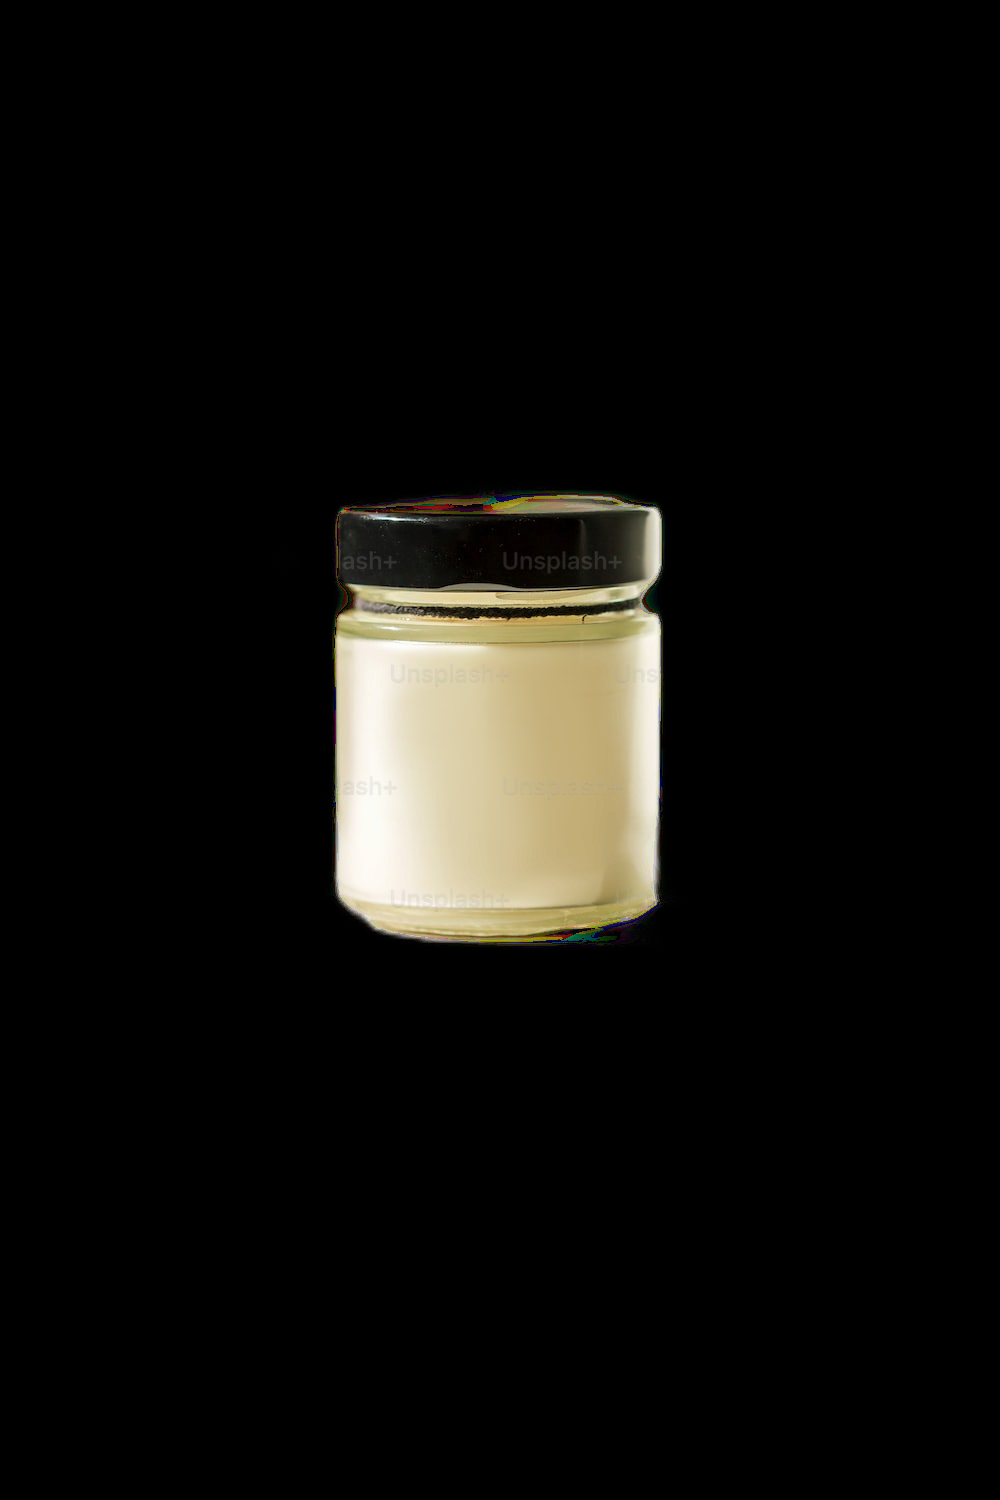

In [617]:
visualize_mask(img, mask)

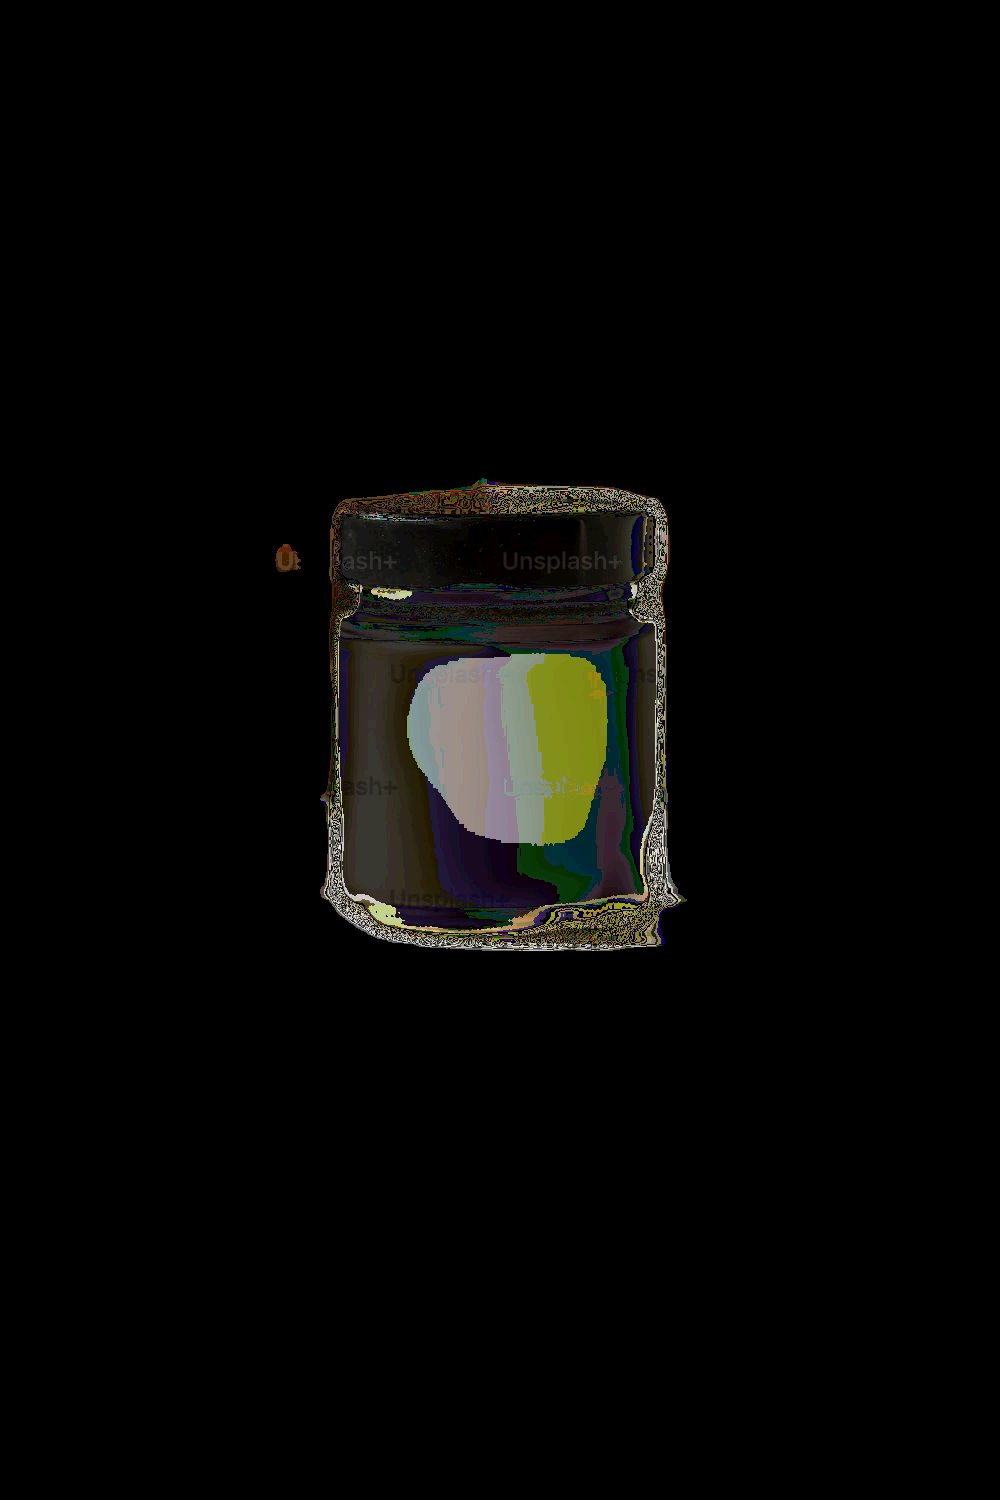

In [618]:
visualize_noise(img, mask)

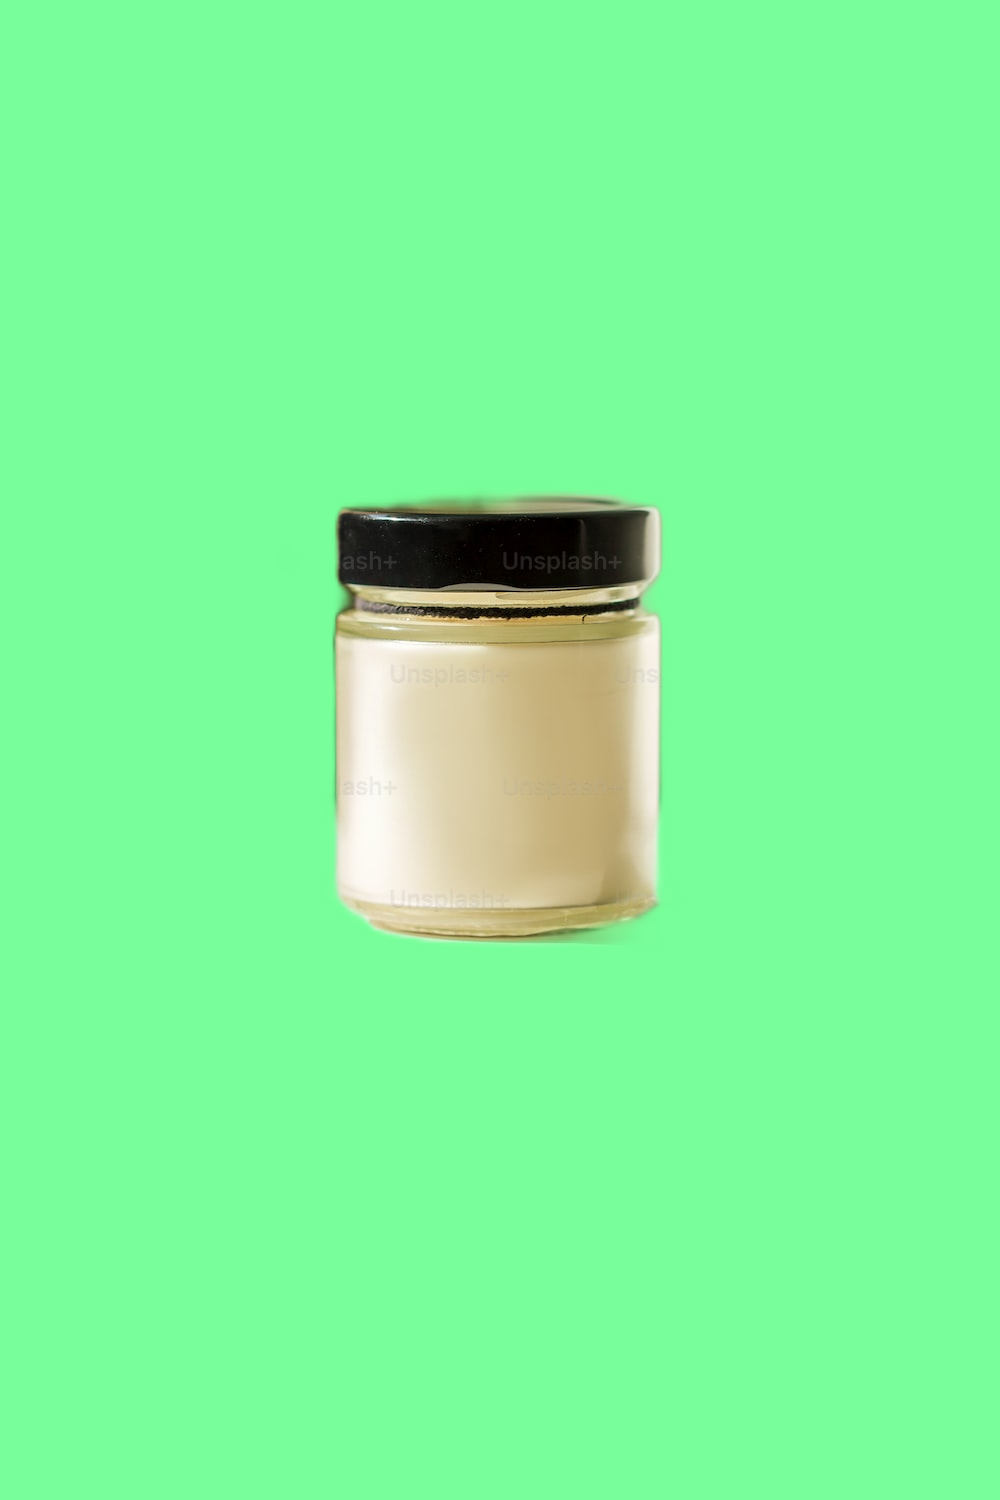

In [619]:
visualize_green(img, mask)

In [620]:
kernel_size = max(3, min(mask.shape[0]//256, mask.shape[1]//256))
erode_mask = cv2.erode(mask, np.ones((kernel_size,kernel_size),np.uint8), iterations=3)
dia_mask = cv2.dilate(erode_mask, np.ones((kernel_size,kernel_size),np.uint8), iterations=3)

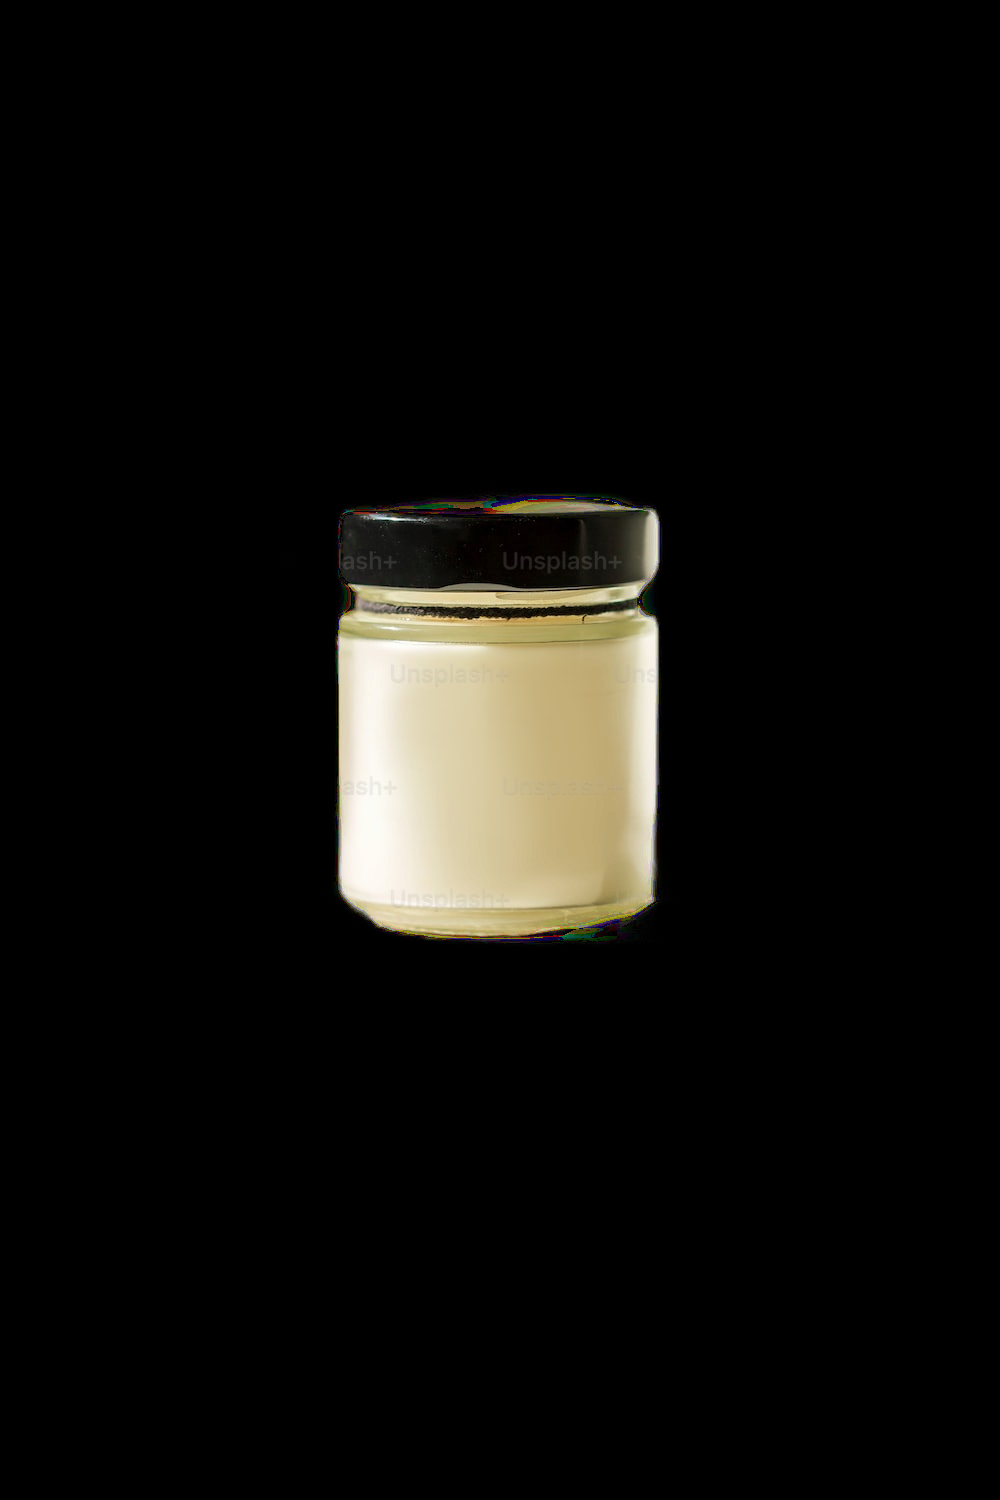

In [621]:
visualize_mask(img, erode_mask)

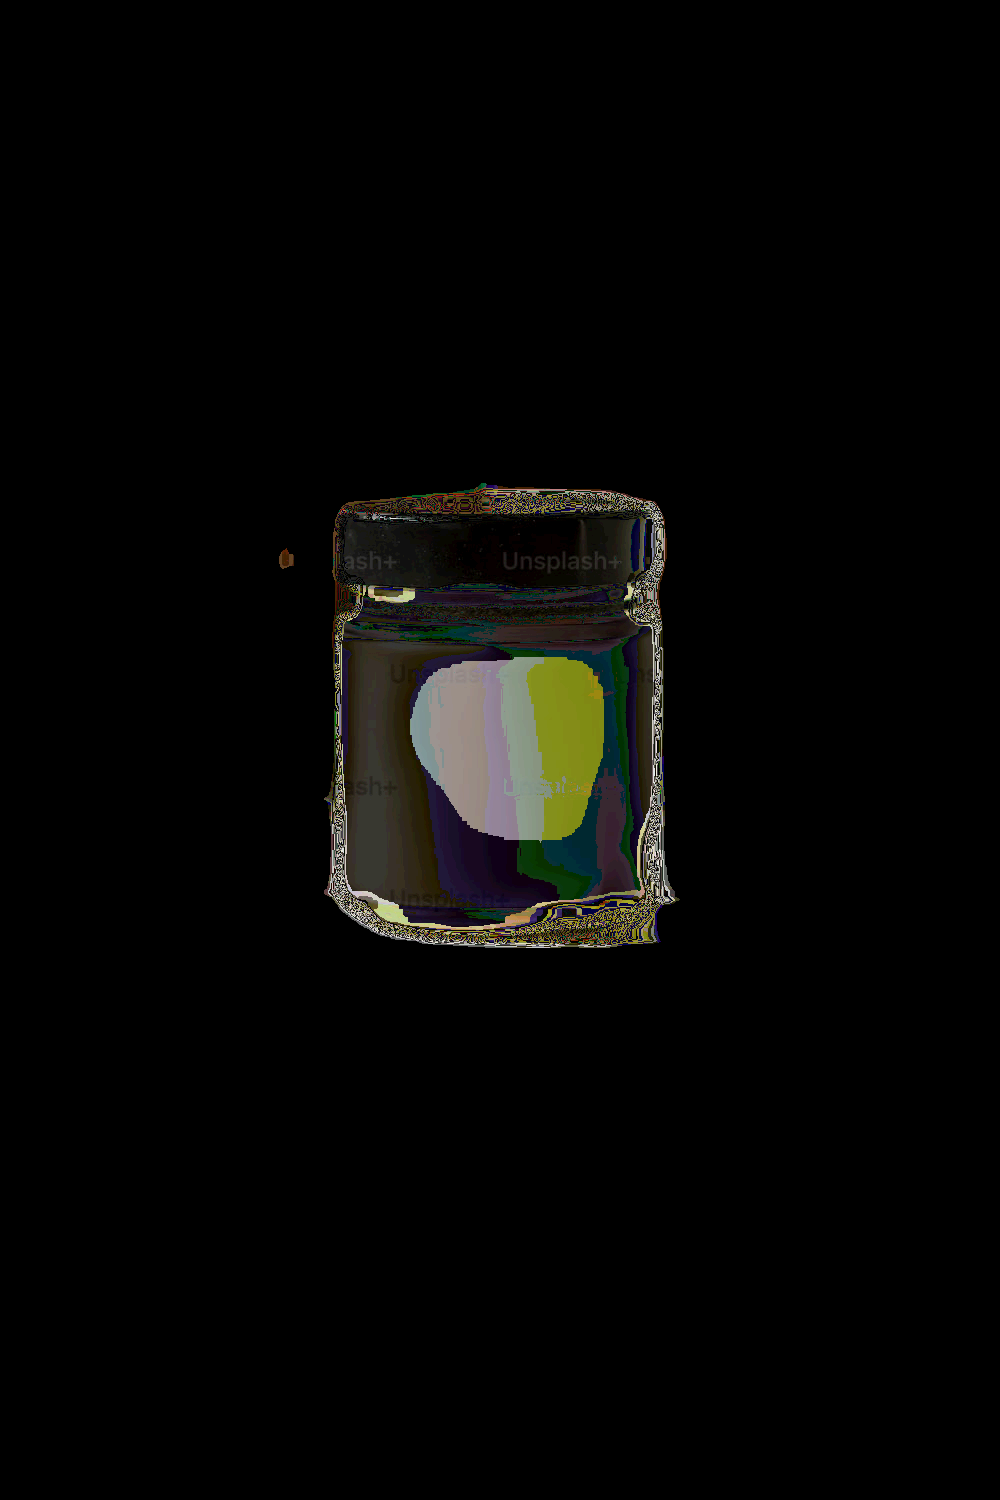

In [622]:
visualize_noise(img, erode_mask)

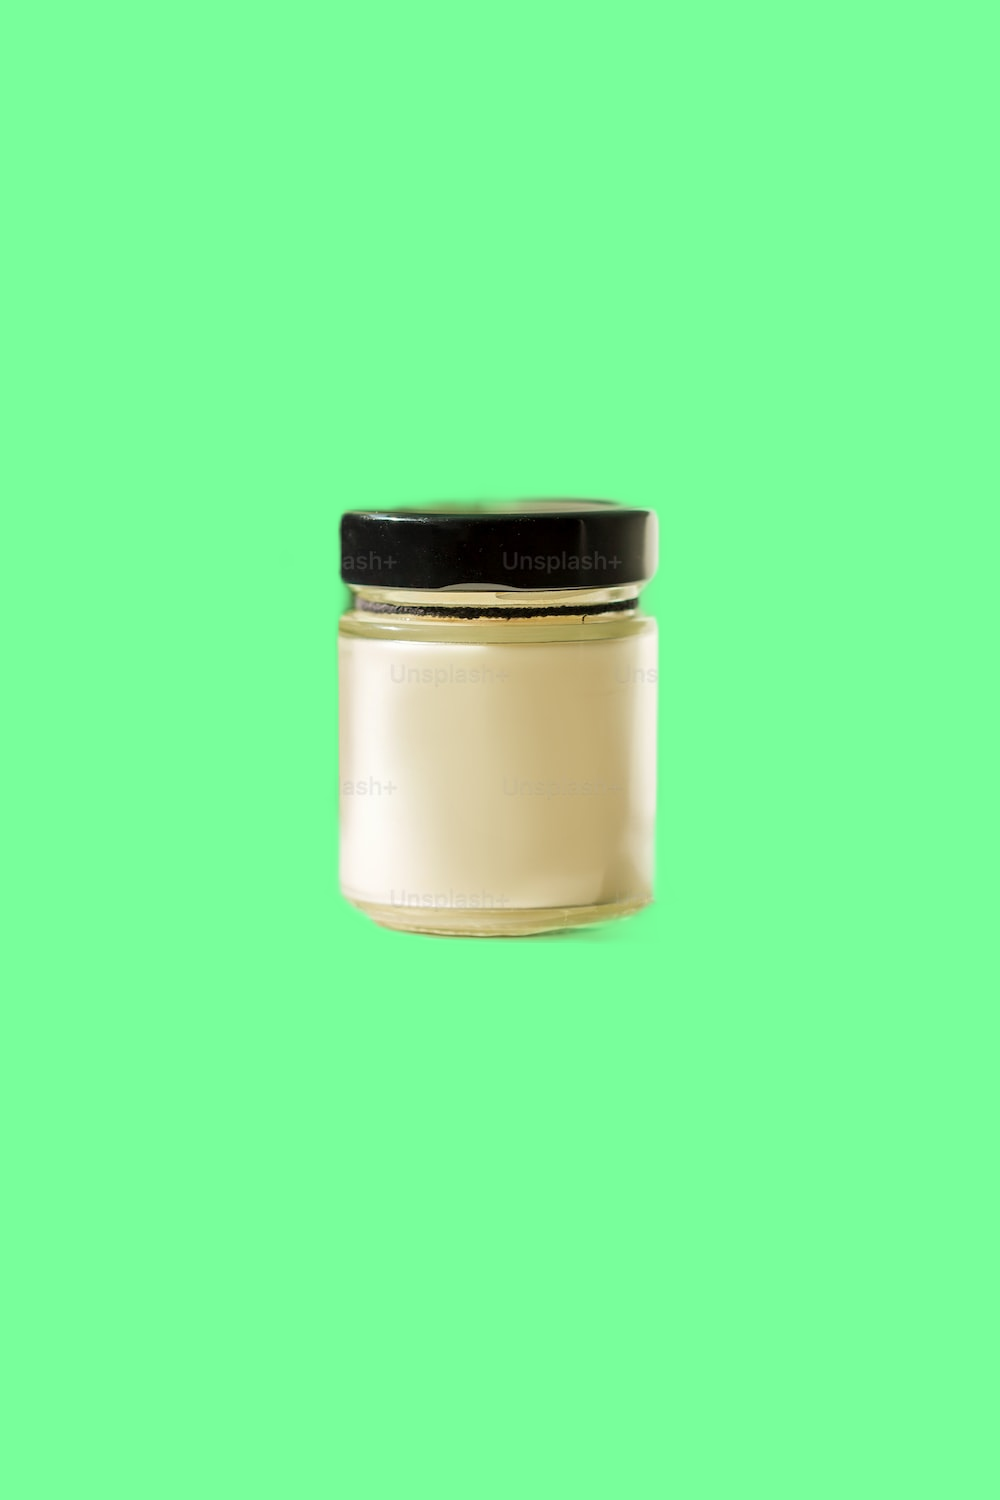

In [623]:
visualize_green(img, erode_mask)

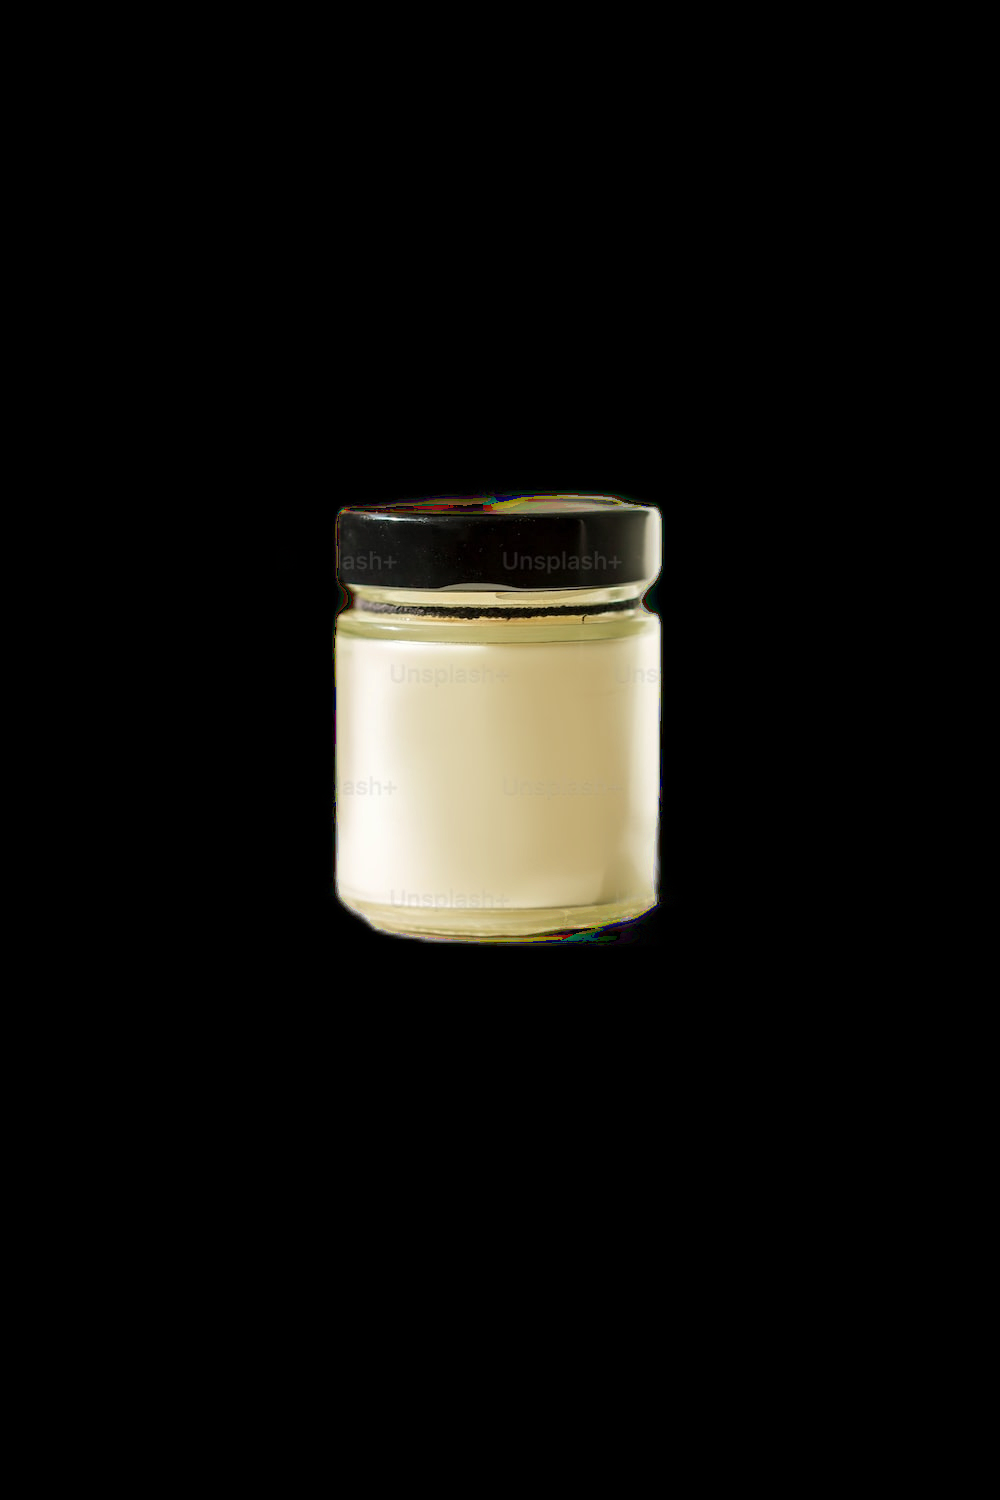

In [624]:
visualize_mask(img, dia_mask)

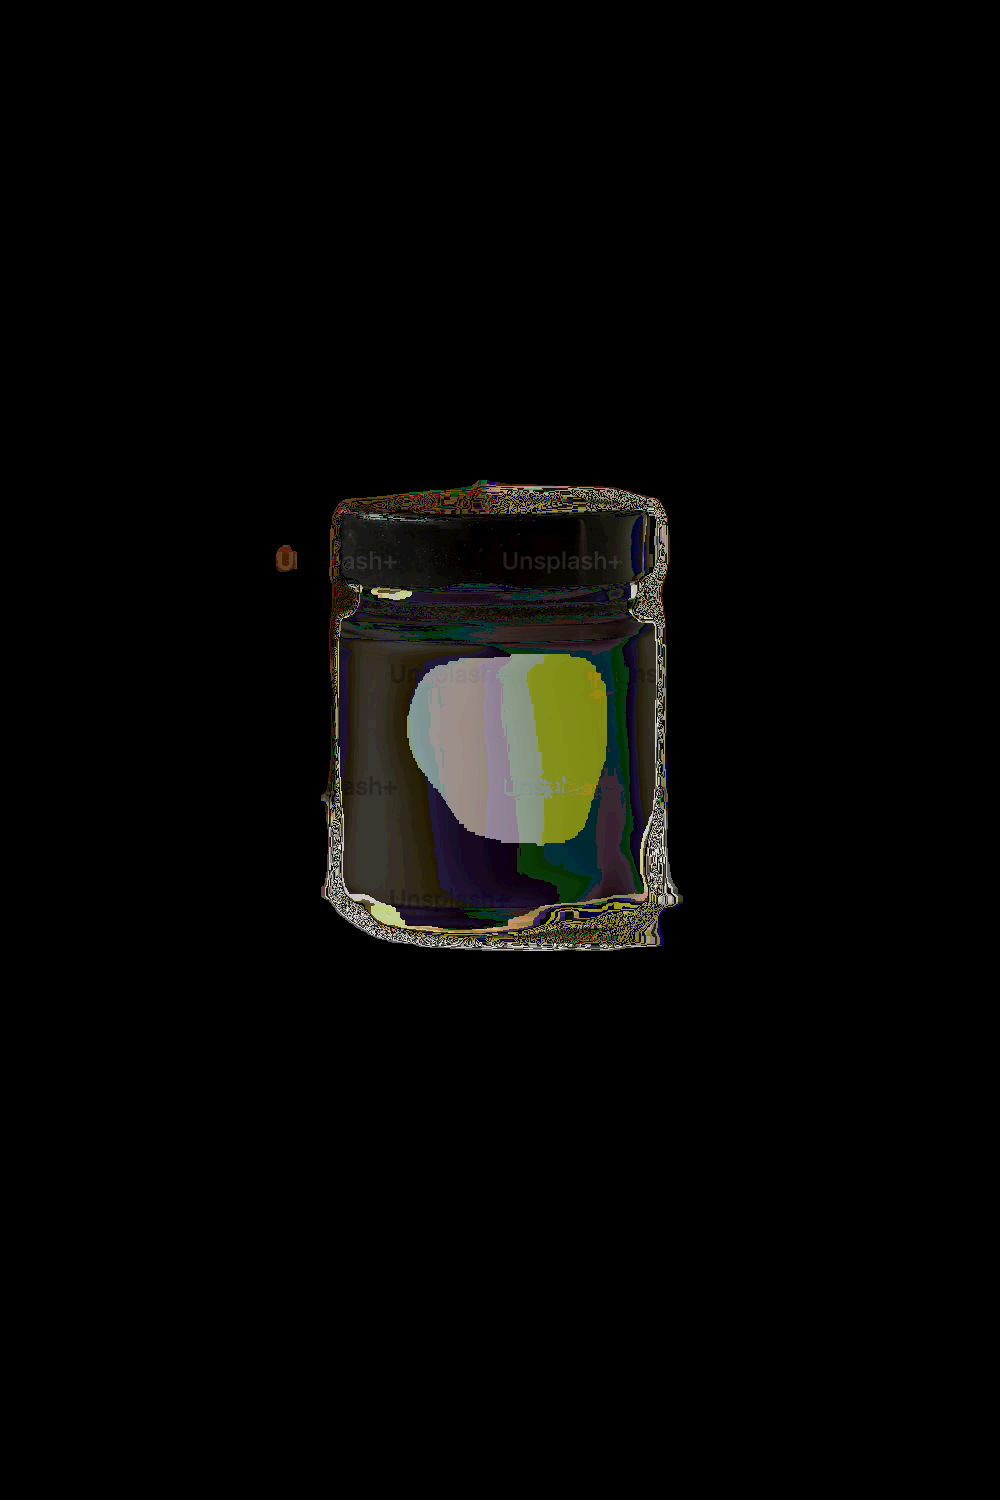

In [625]:
visualize_noise(img, dia_mask)

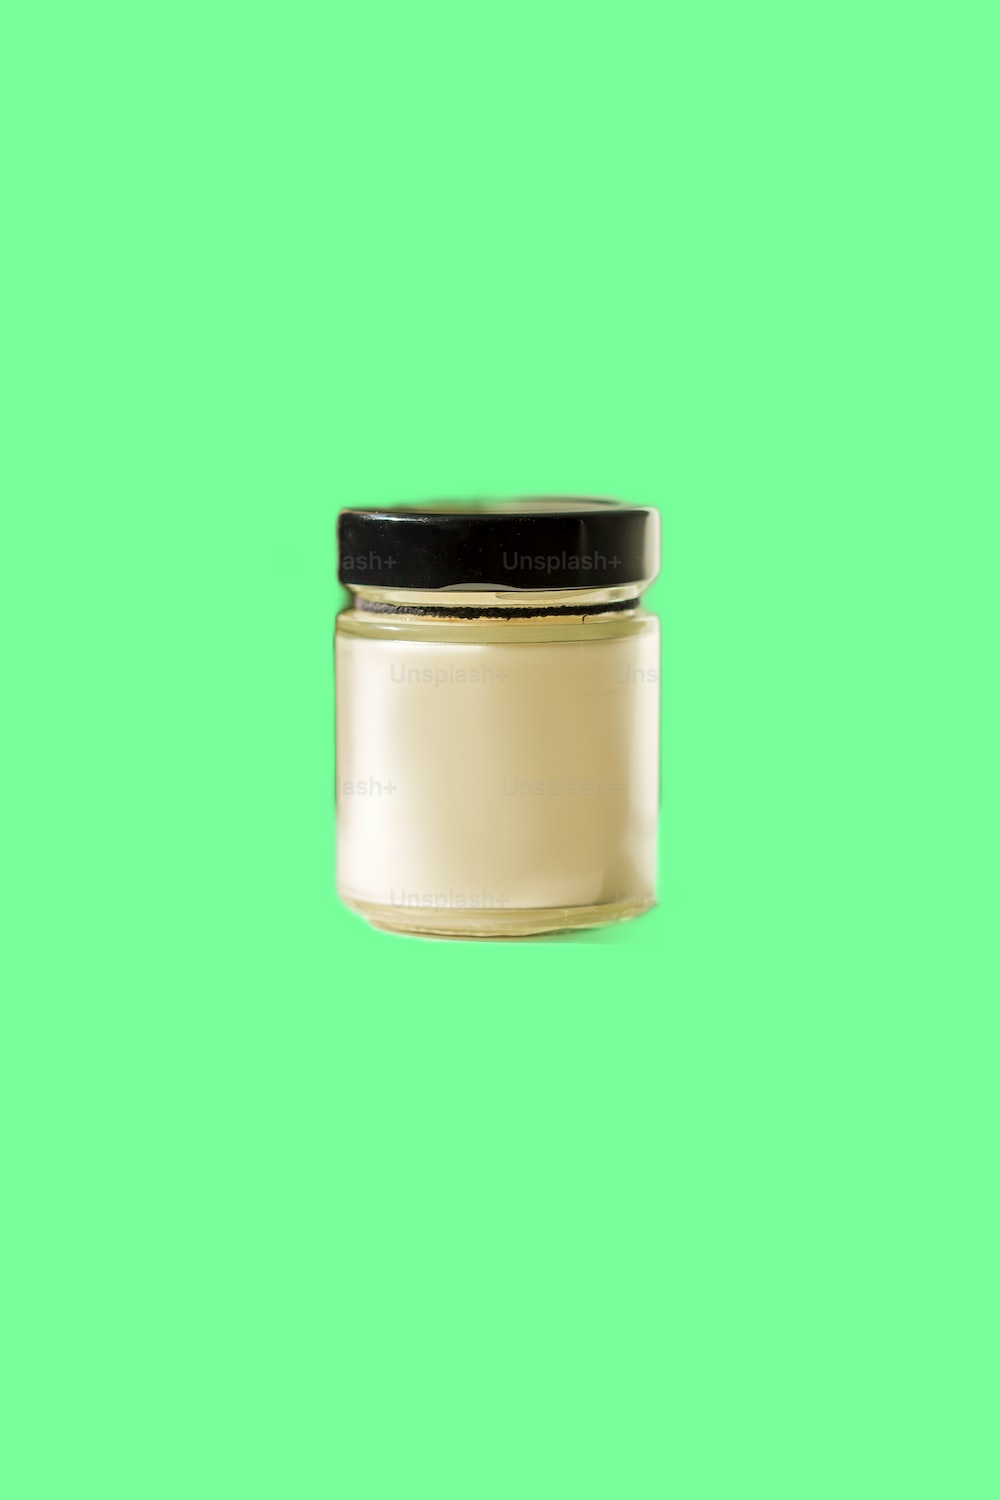

In [626]:
visualize_green(img, dia_mask)

In [627]:
threshhold = 200
mask_thresh = np.where(mask > threshhold, mask, 0)

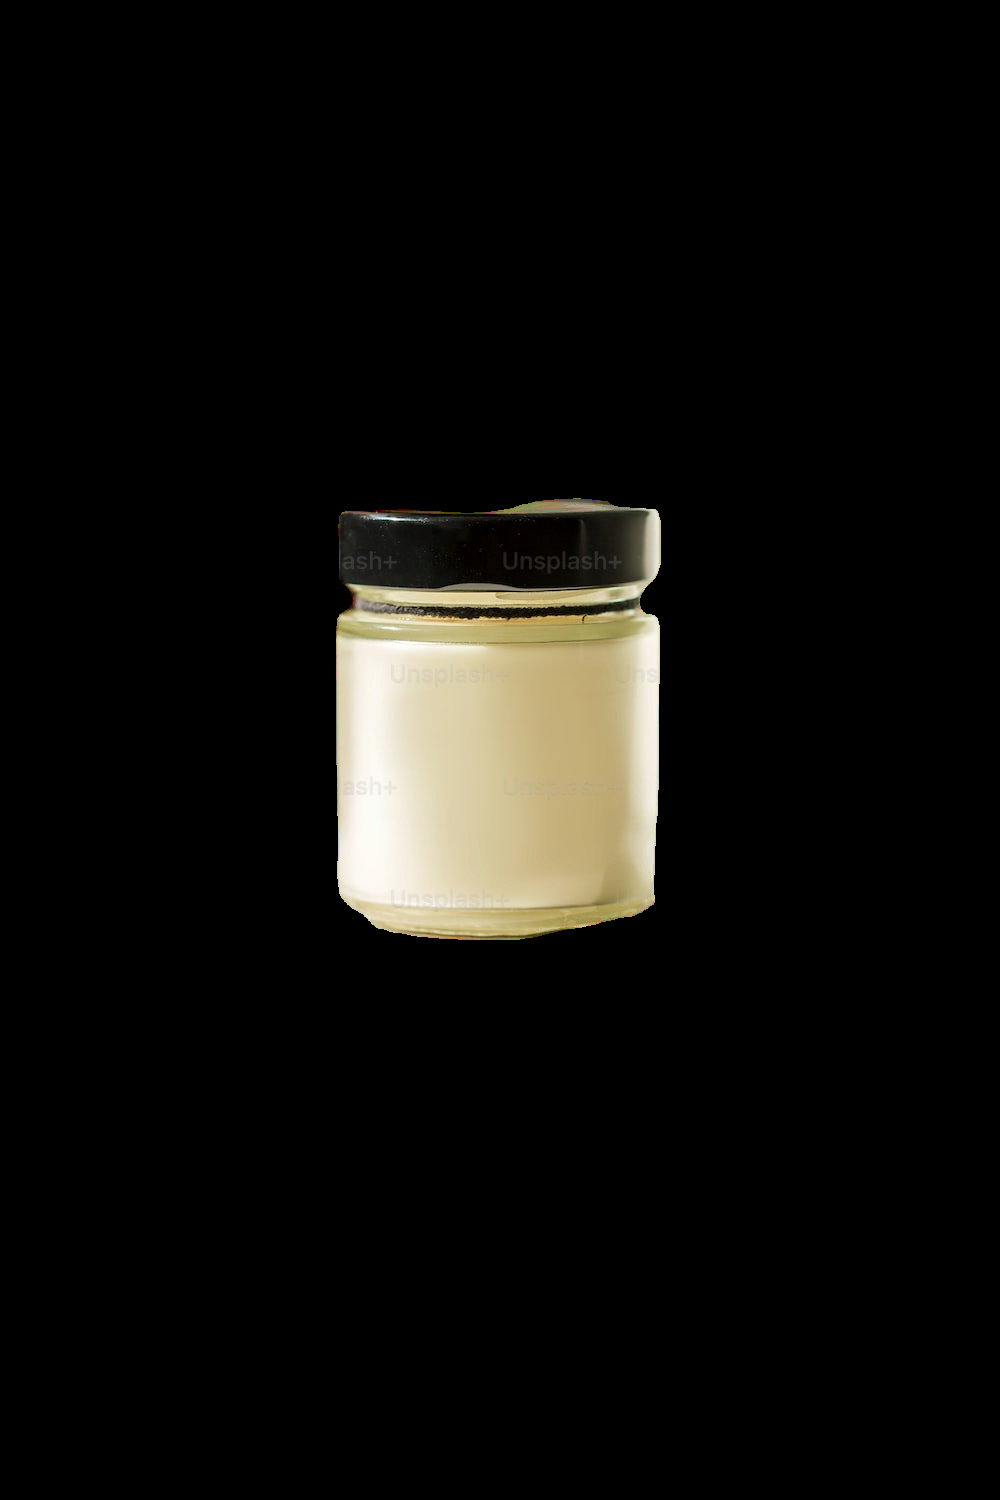

In [628]:
visualize_mask(img, mask_thresh)

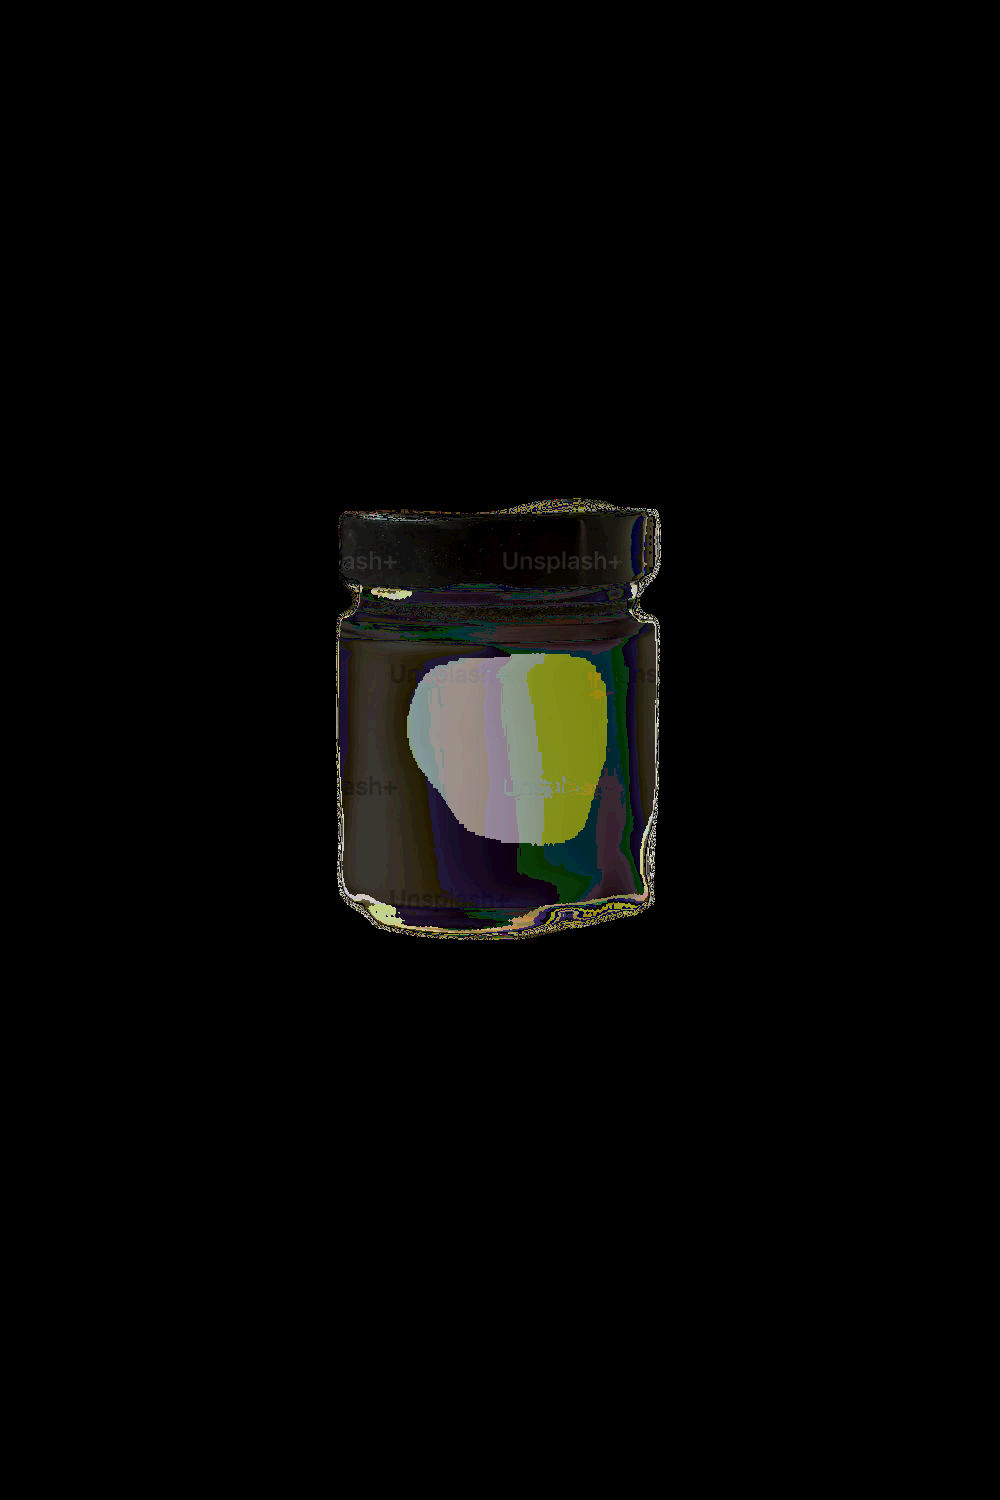

In [629]:
visualize_noise(img, mask_thresh)

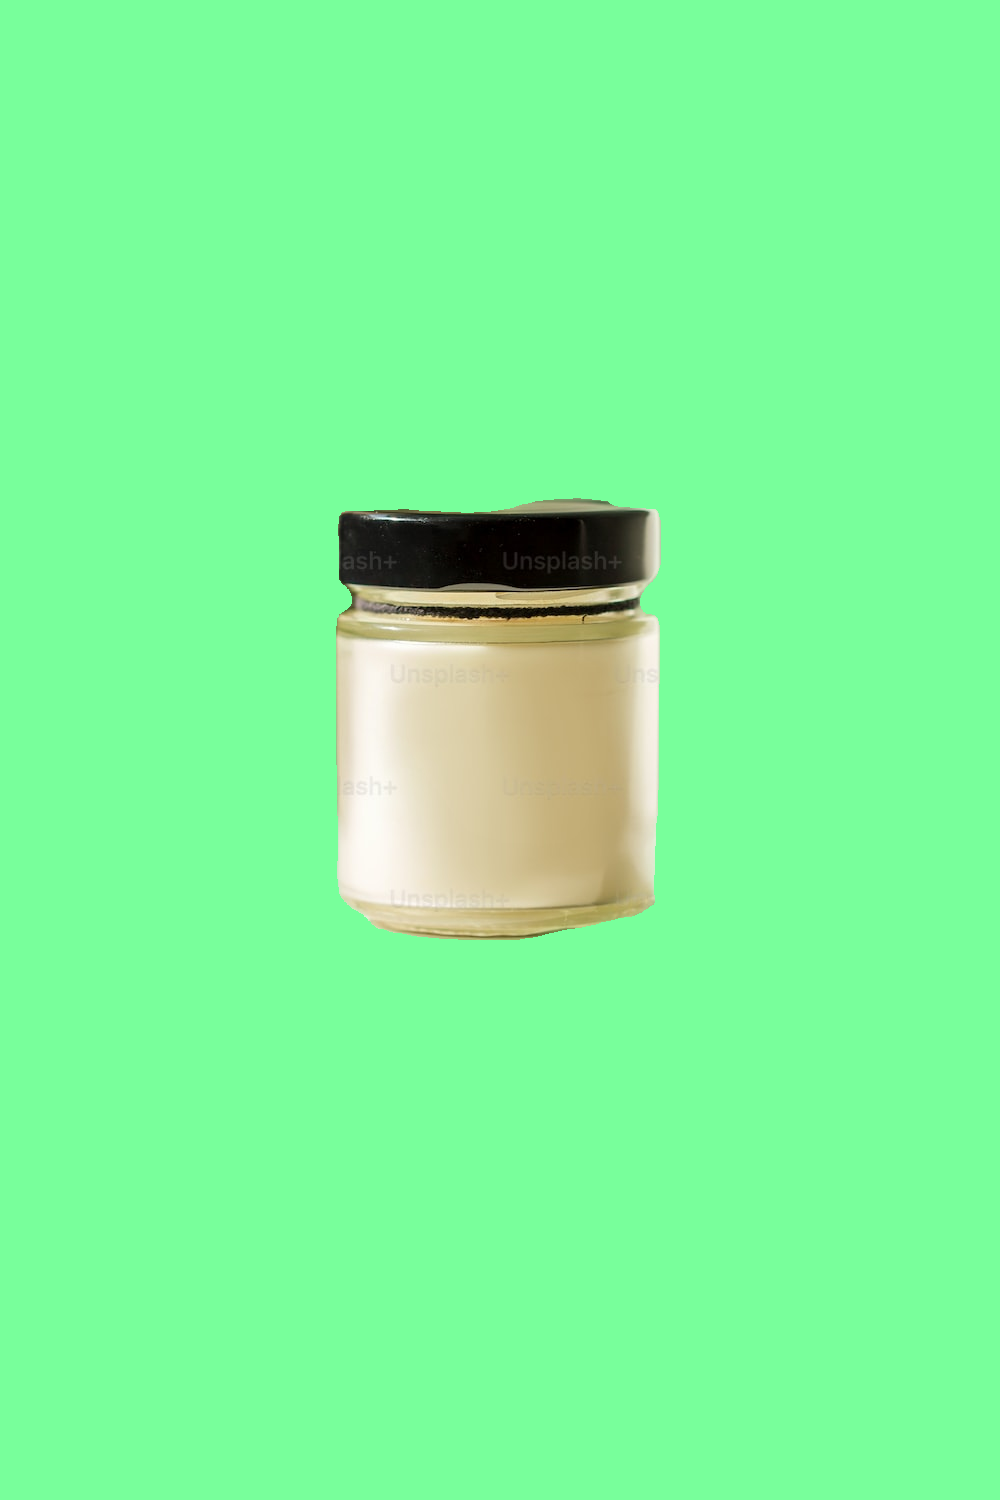

In [630]:
visualize_green(img, mask_thresh)

In [631]:
def mask_sigmoid(x, exp=2.7, value_range=255.0):
    x = x.astype(np.float64)

    y = 1/(1+exp**(135-x))*value_range

    return y.astype(np.uint8)

mask_sig = mask_sigmoid(mask, exp=1.06, value_range=255.0)


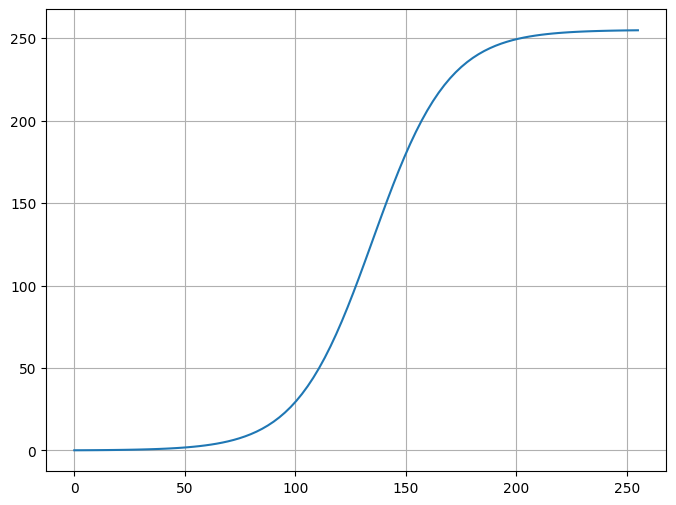

In [632]:
import matplotlib.pyplot as plt

def visualize_fuction(func):
    x = np.linspace(0,255,100)
    y = func(x)

    plt.figure(figsize=(8,6))
    plt.plot(x,y)
    plt.grid(True)
    plt.show()

def sigmoid(x):
    return 1/(1+1.06**(135-x))*255

visualize_fuction(sigmoid)

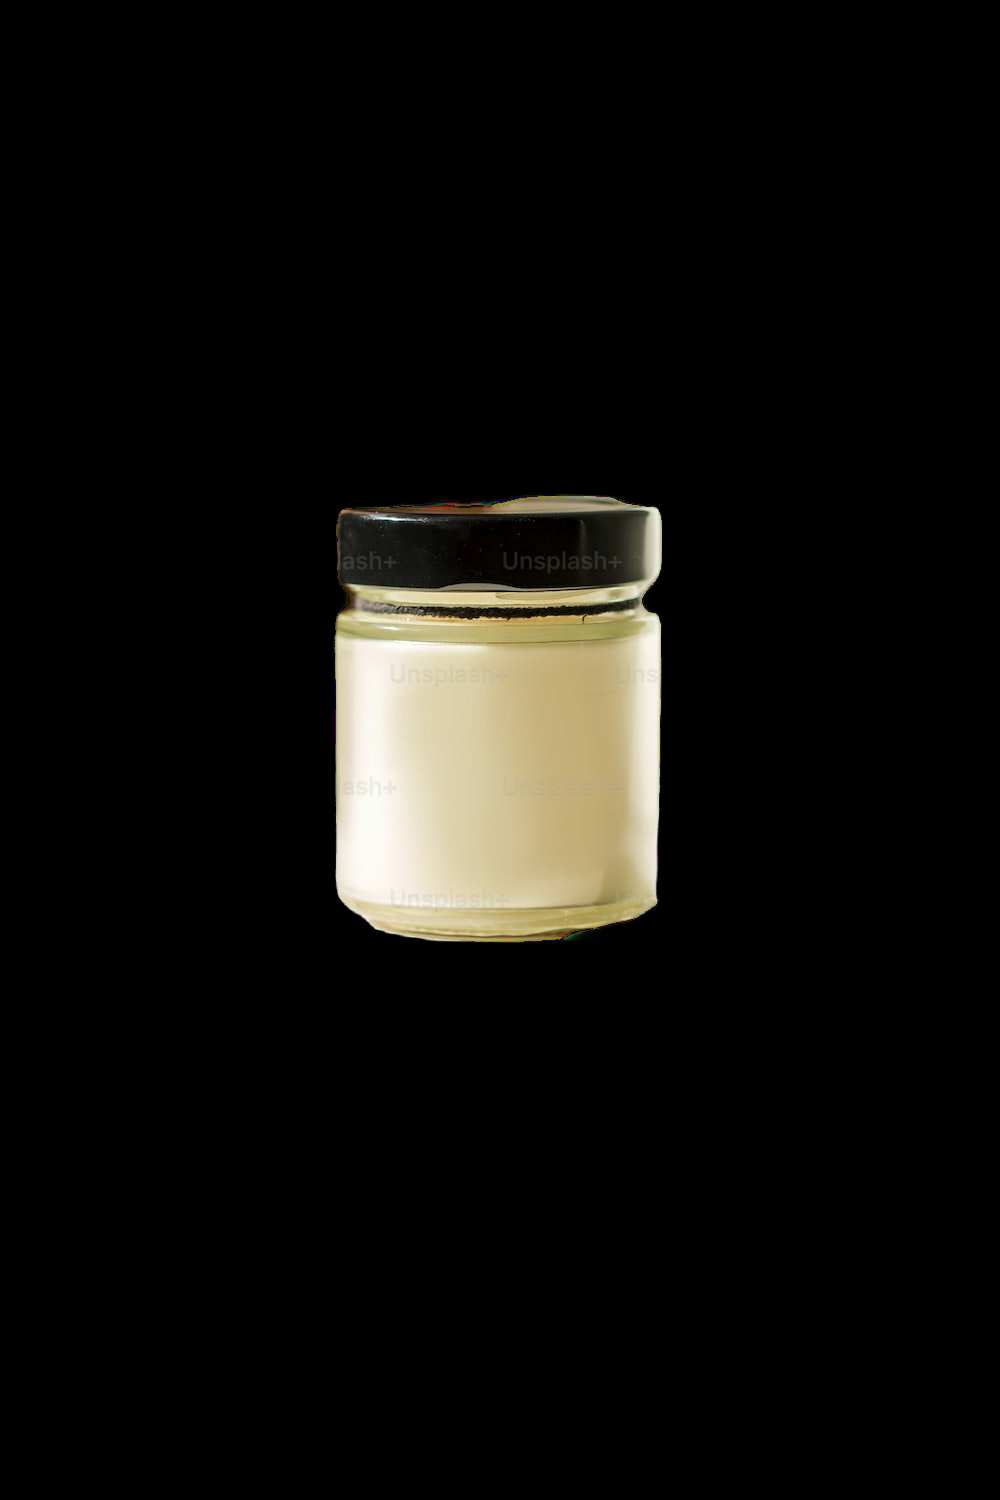

In [633]:
visualize_mask(img, mask_sig)

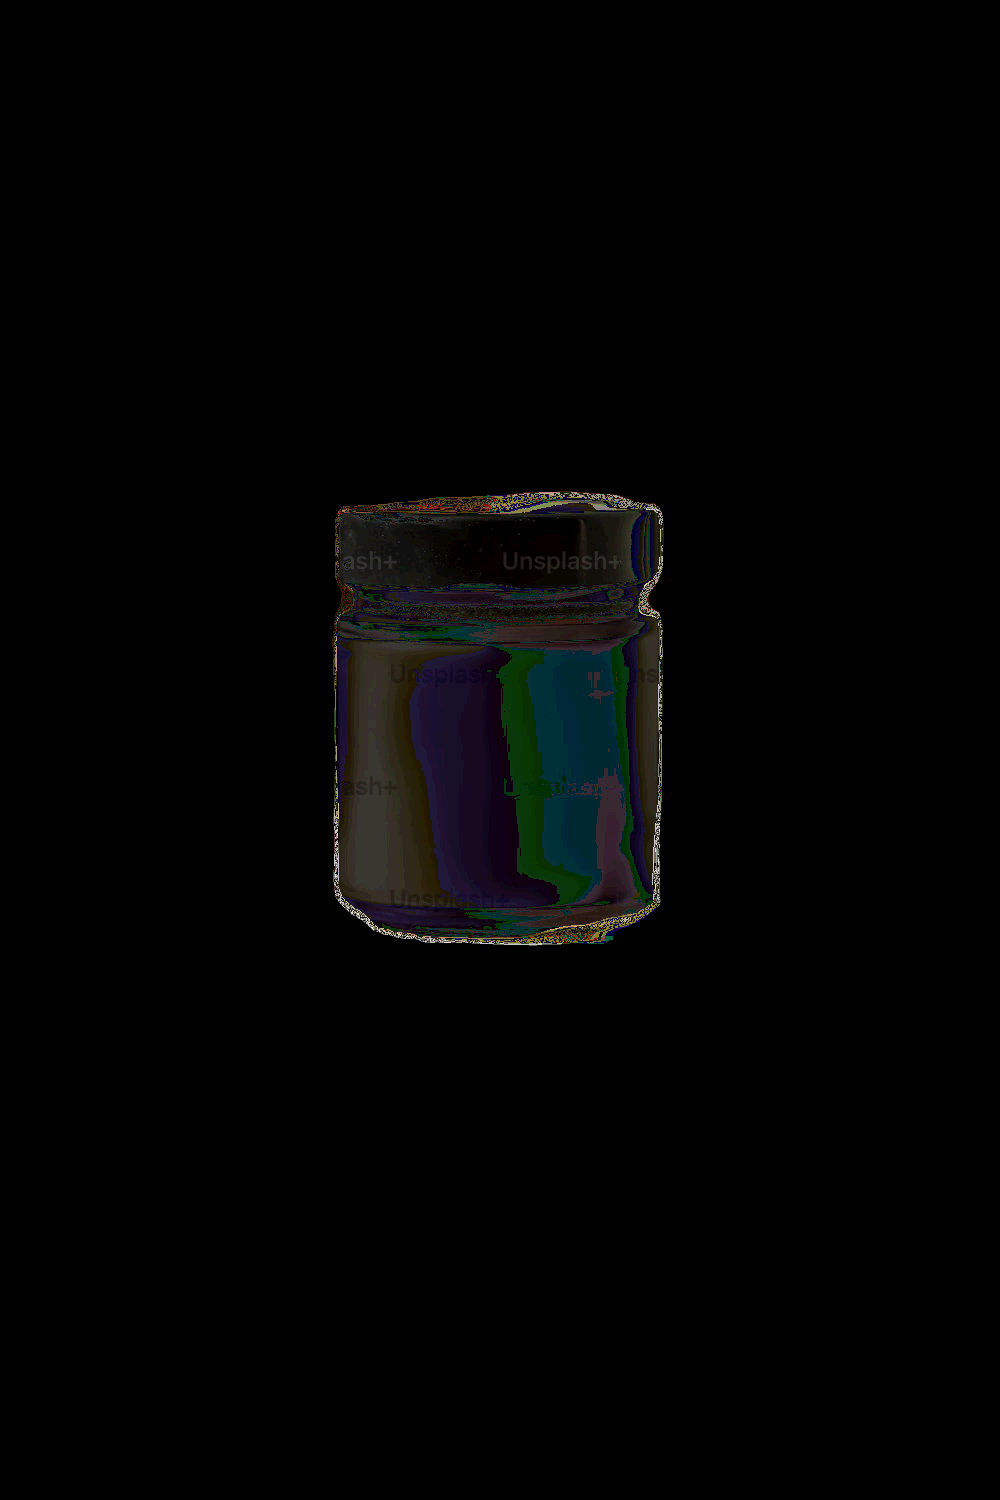

In [634]:
visualize_noise(img, mask_sig)

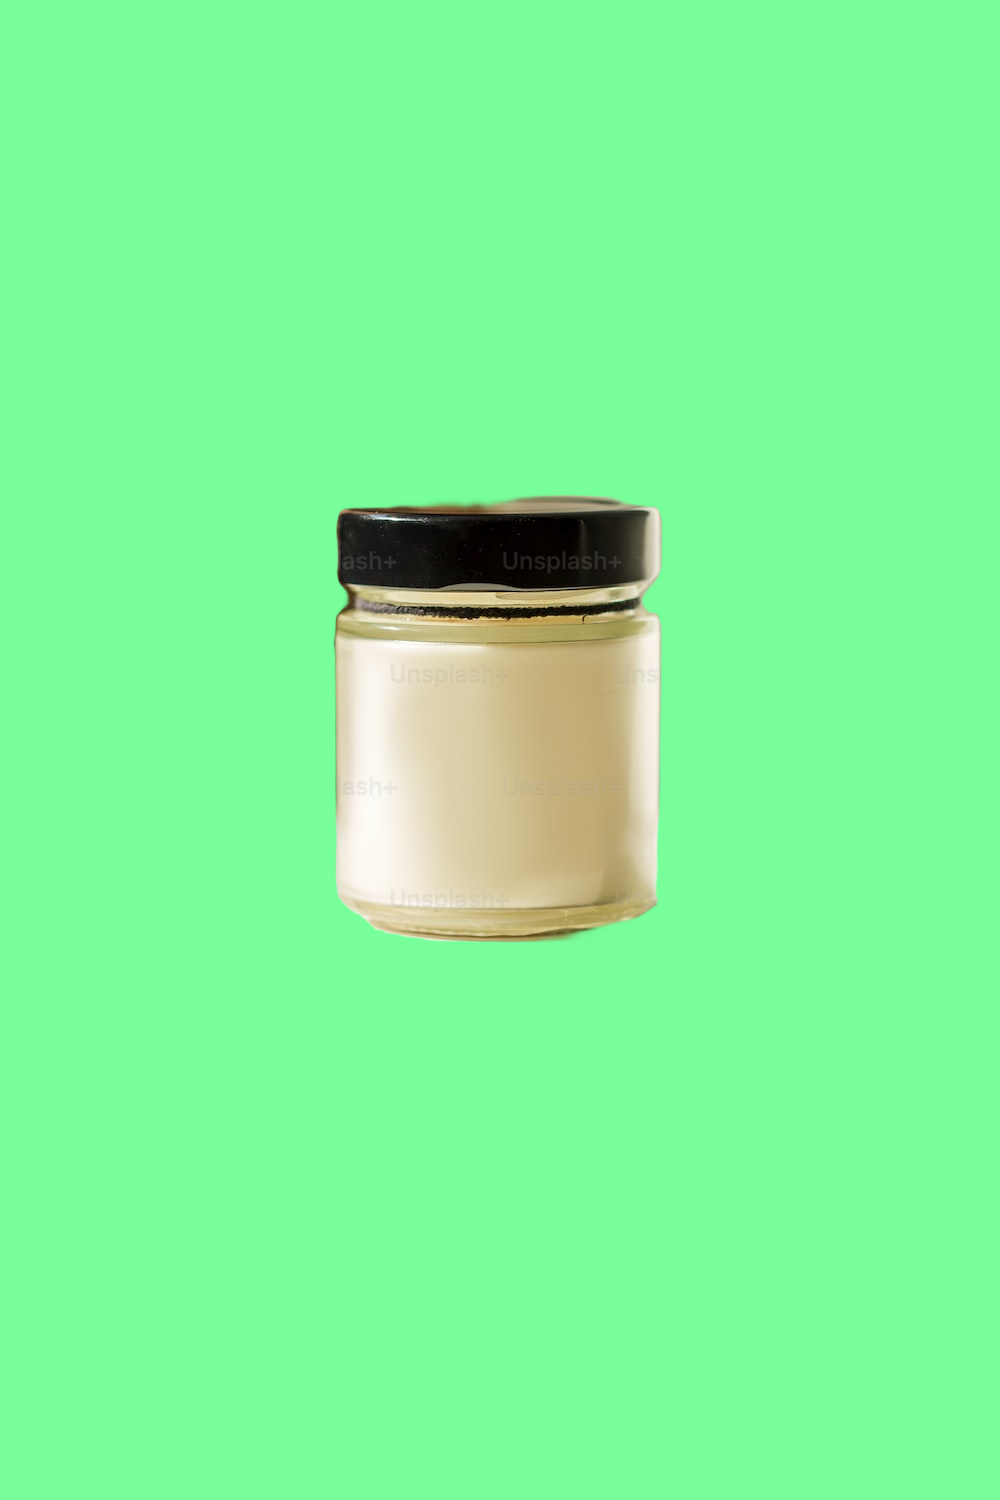

In [635]:
visualize_green(img, mask_sig)

In [636]:
kernel_size = max(3, min(mask.shape[0]//256, mask.shape[1]//256))
erode_mask = cv2.erode(mask_sig, np.ones((kernel_size,kernel_size),np.uint8), iterations=3)
dia_mask = cv2.dilate(erode_mask, np.ones((kernel_size,kernel_size),np.uint8), iterations=3)

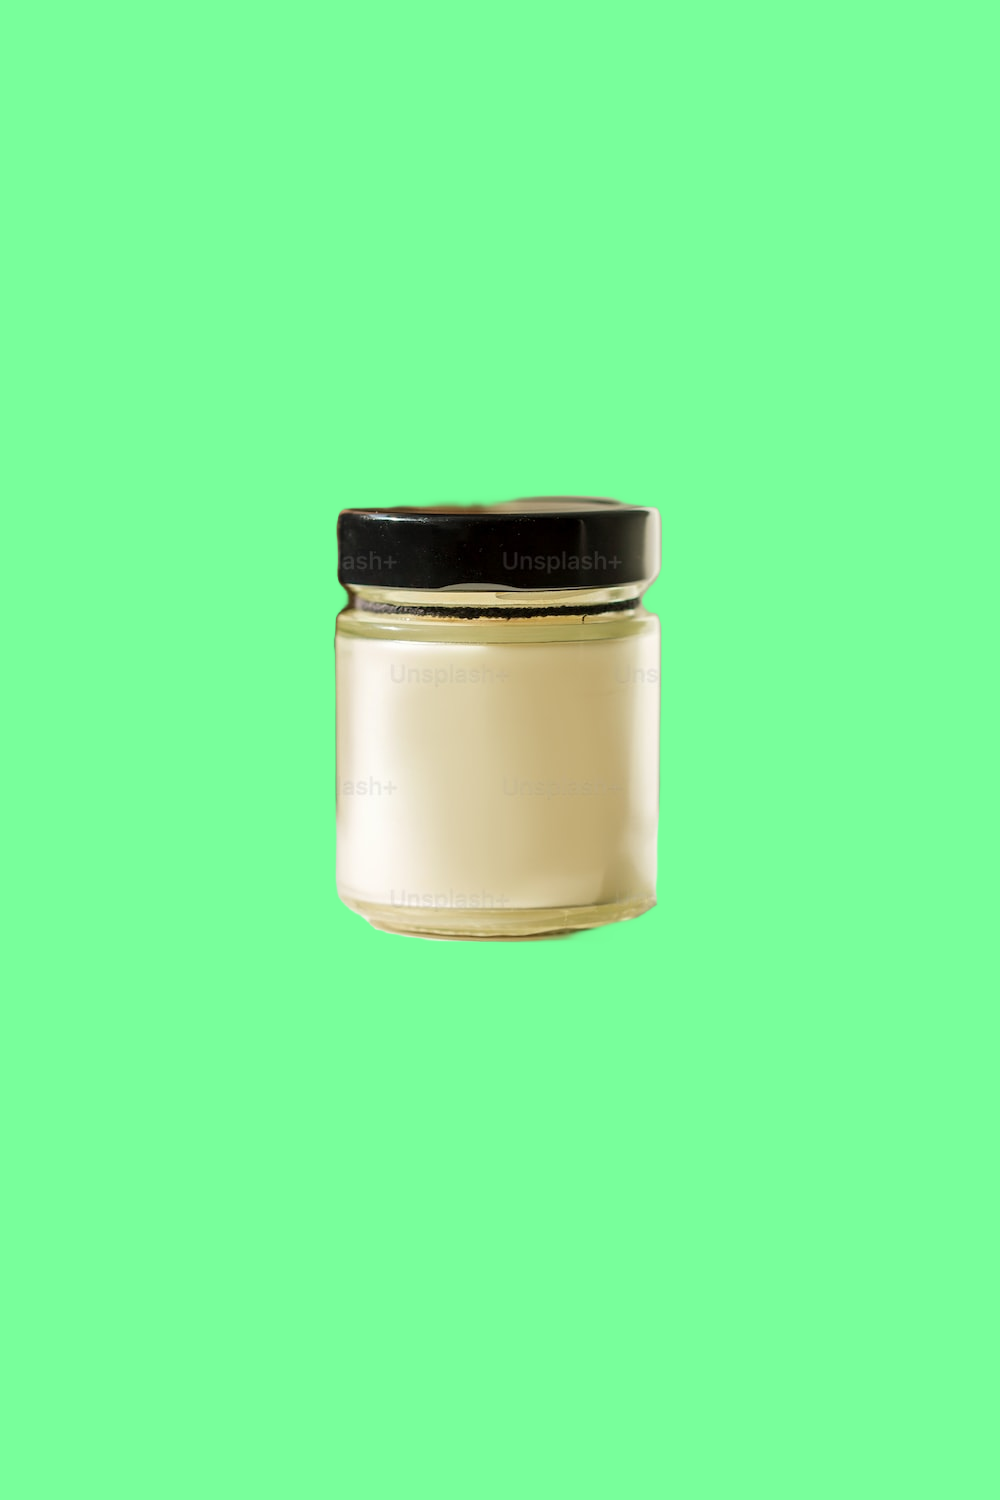

In [637]:
visualize_green(img, dia_mask)